# Inferential Statistics

## Confidence Intervals Using the Normal Distribution & t Distribution

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<Axes: xlabel='day', ylabel='total_bill'>

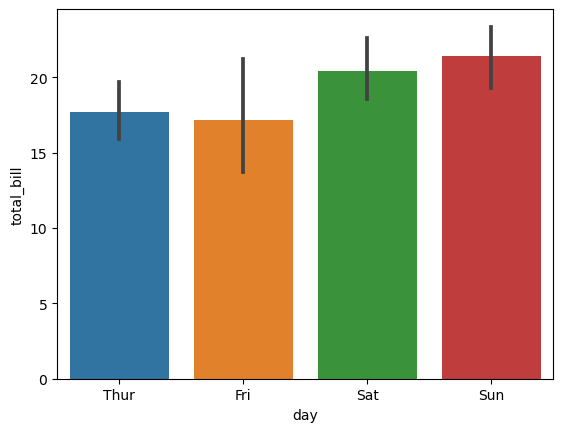

In [12]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=('ci', 95))

In [13]:
tipsFri = tips[tips["day"] == "Fri"]

In [14]:
tipsFri

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [15]:
tipsFri.shape

(19, 7)

In [16]:
xbar = tipsFri.total_bill.mean()

In [17]:
xbar

17.15157894736842

In [18]:
len(tipsFri)

19

In [19]:
sem = tipsFri.total_bill.sem()

In [20]:
sem

1.904760773479416

In [21]:
tipsFri.total_bill.std() / np.sqrt(len(tipsFri))

1.904760773479416

CONFIDENCE INTERVAL ESTIMATES

In [22]:
moe = 1.96 * sem
moe

3.7333311160196554

In [23]:
upper = xbar + moe

In [24]:
upper

20.884910063388077

In [25]:
lower = xbar - moe
lower

13.418247831348765

In [26]:
stats.norm.interval(0.95, loc=xbar, scale=sem )

(13.41831643218411, 20.884841462552732)

In [27]:
stats.norm.interval(0.95, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem() )

(13.41831643218411, 20.884841462552732)

t-distribution

In [28]:
len(tipsFri)

19

In [29]:
stats.t.interval(0.95, df=len(tipsFri)-1, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.149825056979097, 21.153332837757745)

<Axes: xlabel='day', ylabel='total_bill'>

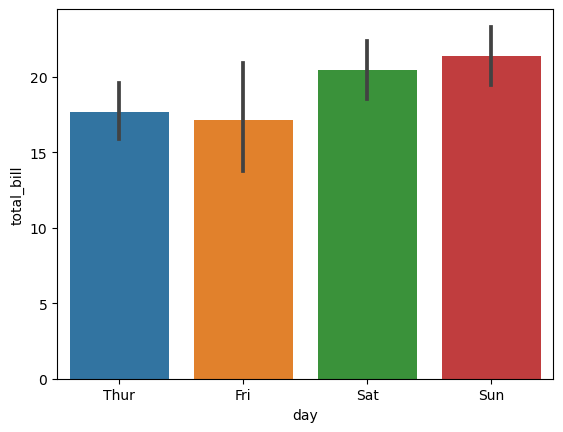

In [30]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=('ci', 95))

In [31]:
tipsSun = tips[tips["day"] == "Sun"]

In [32]:
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
tipsSun.info

<bound method DataFrame.info of      total_bill   tip     sex smoker  day    time  size
0         16.99  1.01  Female     No  Sun  Dinner     2
1         10.34  1.66    Male     No  Sun  Dinner     3
2         21.01  3.50    Male     No  Sun  Dinner     3
3         23.68  3.31    Male     No  Sun  Dinner     2
4         24.59  3.61  Female     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
186       20.90  3.50  Female    Yes  Sun  Dinner     3
187       30.46  2.00    Male    Yes  Sun  Dinner     5
188       18.15  3.50  Female    Yes  Sun  Dinner     3
189       23.10  4.00    Male    Yes  Sun  Dinner     3
190       15.69  1.50    Male    Yes  Sun  Dinner     2

[76 rows x 7 columns]>

In [34]:
len(tipsSun)

76

In [35]:
stats.t.interval(0.95, df=len(tipsSun)-1, loc=tipsSun.total_bill.mean(), scale=tipsSun.total_bill.sem())

(19.39177370652103, 23.42822629347897)

In [36]:
stats.norm.interval(0.95, loc=tipsSun.total_bill.mean(), scale=tipsSun.total_bill.sem())

(19.424333330977177, 23.395666669022823)

In [37]:
xbar = tipsSun.total_bill.mean()
xbar

21.41

In [38]:
std = tipsSun.total_bill.std()
std

8.832121828869889

In [39]:
sem = std / np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [40]:
moe = 1.96 * sem
moe

1.9857031567843058

In [41]:
upper = xbar + moe
upper

23.395703156784307

In [42]:
lower = xbar - moe
lower

19.424296843215693